### Linear State Space Model
---

$$ x_{t+1} = Ax_t + Cw_{t+1} $$
$$ y_t = Gx_t $$
$$ x_0 ~ N(\mu_0, \Sigma_0) $$

### Second Order Difference Equation
---

$$ y_{t+1} = \phi_0 + \phi_1y_t+ \phi_2y_{t-1} $$

subject to: $ y_0, y_{-1}  $ given

Map this into a state space representation:

$ x_t = \begin{bmatrix} 1\\y_t \\ y_{t-1}\end{bmatrix}  $  $ A = \begin{bmatrix} 1 & 0 & 0 \\ \phi_0 & \phi_1 & \phi_2 \\ 0 & 1 & 0 \end{bmatrix} $ $ C = \begin{bmatrix} 0 \\ 0 \\ 0\end{bmatrix} $ $ G = \begin{bmatrix} 0 & 1 & 0\end{bmatrix} $










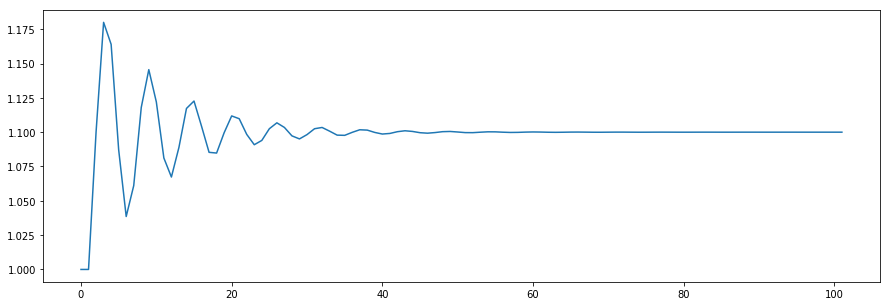

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from pylab import rcParams 
%matplotlib inline
rcParams['figure.figsize'] = 15,5

# Initial Observations

y_0 = 1
y_1d = 1

# State transition matrix parameters

phi_0 = 1.1
phi_1 = 0.8
phi_2 = -0.8

y = [y_1d, y_0]

for i in range(100):
    y.append(phi_0 + phi_1*y[i+1] + phi_2*y[i])
    
plt.plot(y)

In [108]:
# State Space

import numpy as np

phi_0 = 1.1
phi_1 = 0.8
phi_2 = -0.8

y_1d = 1
y_0 = 1

trans_mat = np.matrix([
                        [1, 0, 0],
                        [phi_0, phi_1, phi_2],
                        [0,1,0]
                    ])

initial = np.matrix([[1],[y_0], [y_1d]])


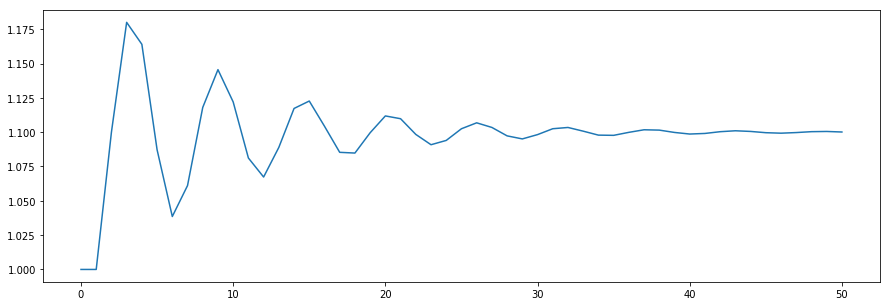

In [107]:
def second_order_diff(trans_mat, initial, iterations):
    
    state_vec = np.array(1)
    
    for i in range(iterations):
        
        #print initial[1]
        state_vec = np.append(state_vec, initial[1])
        
        initial = np.matmul(trans_mat, initial)
        
        
        
        #np.append([state_vec], vec , axis = 0)
        
    return state_vec
        
vec = second_order_diff(trans_mat, initial, 50)

plt.plot(vec)


$$ y_{t+1} = \phi_1y_t + \phi_2y_{t-1} + \phi_3y_{t-2} + \phi_4y_{t-3} + \sigma w_{t+1} $$

$$ x_{t+1} = Ax_t + Cw_{t+1} $$
$$ y_t = Gx_t $$
$$ x_0 ~ N(\mu_0, \Sigma_0) $$

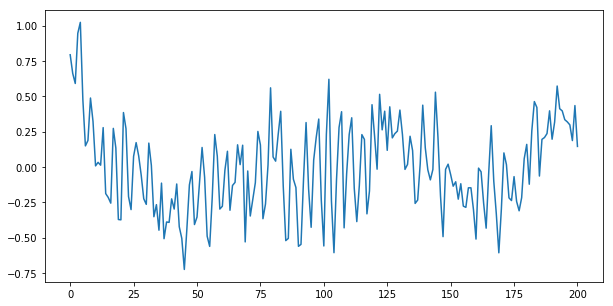

In [12]:
# Univariate Autoregressive Processes
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = 10,5

import numpy as np

y_0 = np.random.normal(0,1)
y_1d = np.random.normal(0,1)
y_2d = np.random.normal(0,1)
y_3d = np.random.normal(0,1)

phi_1 = 0.5
phi_2 = -0.2
phi_3 = 0
phi_4 = 0.5


sigma = 0.2



trans_mat = np.matrix([
                        [phi_1, phi_2, phi_3, phi_4 ],
                        [1,0,0,0],
                        [0,1,0,0],
                        [0,0,1,0],
])

vol_mat = np.matrix([
    [sigma],
    [0],
    [0],
    [0]
])

output_mat = np.matrix([
    [1],
    [0],
    [0],
    [0]
])


obs_mat = np.matrix([
    [y_0],
    [y_1d],
    [y_2d],
    [y_3d]
])



def ar_3(trans_mat, obs_mat, vol_mat, iterations):
    
    noise = np.random.normal(0,1,iterations)
    noise = np.transpose(np.matrix(noise))
    
    states = [obs_mat[0,0]]
    for i in range(len(noise)):

        
        obs_mat = np.matmul(trans_mat, obs_mat) + np.matmul(vol_mat, noise[i])
        states.append(obs_mat[0,0])
    
    #    print obs_mat
    
    return states
        
x = ar_3(trans_mat, obs_mat, vol_mat, 200)

plt.plot(x)

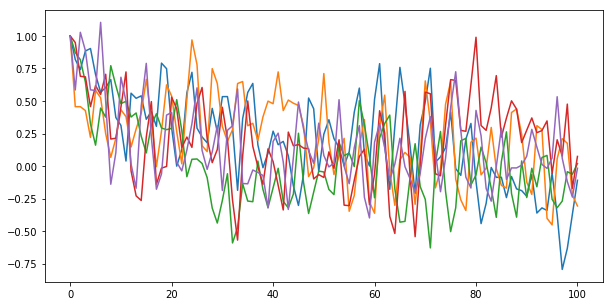

In [38]:
# Univariate Autoregressive Processes
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 10,5

import numpy as np

# y_0 = np.random.normal(0,1)
# y_1d = np.random.normal(0,1)
# y_2d = np.random.normal(0,1)
# y_3d = np.random.normal(0,1)

y_0 = y_1d = y_2d = y_3d = 1

phi_1 = 0.5
phi_2 = -0.2
phi_3 = 0
phi_4 = 0.5


sigma = 0.2



trans_mat = np.matrix([
                        [phi_1, phi_2, phi_3, phi_4 ],
                        [1,0,0,0],
                        [0,1,0,0],
                        [0,0,1,0],
])

vol_mat = np.matrix([
    [sigma],
    [0],
    [0],
    [0]
])

output_mat = np.matrix([
    [1],
    [0],
    [0],
    [0]
])


obs_mat = np.matrix([
    [y_0],
    [y_1d],
    [y_2d],
    [y_3d]
])


def ar_3(trans_mat, obs_mat, vol_mat, iterations):
    
    noise = np.random.normal(0,1,iterations)
    noise = np.transpose(np.matrix(noise))
    
    states = [obs_mat[0,0]]
    

    
    for i in range(len(noise)):

        
        obs_mat = np.matmul(trans_mat, obs_mat) + np.matmul(vol_mat, noise[i])
        states.append(obs_mat[0,0])

    #    print obs_mat
    
    return states, states[-1]

x = []
y = []

for i in range(5):
    x.append(ar_3(trans_mat, obs_mat, vol_mat, 100)[0])
    y.append(ar_3(trans_mat, obs_mat, vol_mat, 100)[1])
    

for i in x:
    plt.plot(i)
    


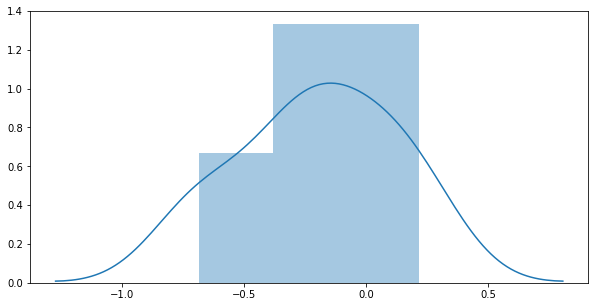

In [39]:
sns.distplot(y)

# This plot shows us that the different values of Y_T (the last value of the realisation) are normally distributed
